# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units +"&q=" + city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=taiohae
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=pont rouge
Processing Record 2 of Set 1 | pont rouge
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=shwebo
Processing Record 3 of Set 1 | shwebo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kodiak
Processing Record 4 of Set 1 | kodiak
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=port-aux-francais
Processing Record 5 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=ilulissat
Processing Record 6 of Set 1 | il

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=liwonde
Processing Record 3 of Set 2 | liwonde
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=atafu village
Processing Record 4 of Set 2 | atafu village
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=aasiaat
Processing Record 5 of Set 2 | aasiaat
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=torghay
Processing Record 6 of Set 2 | torghay
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=isabela
Processing Record 7 of Set 2 | isabela
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=namibe
Processing Record 8 of Set 2 | namibe
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=met

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=veraval
Processing Record 7 of Set 3 | veraval
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=dudinka
Processing Record 8 of Set 3 | dudinka
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=isangel
Processing Record 9 of Set 3 | isangel
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=tranovaho
Processing Record 10 of Set 3 | tranovaho
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kotel'nich
Processing Record 11 of Set 3 | kotel'nich
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=saratamata
Processing Record 12 of Set 3 | saratamata
City not found. Skipping...
https://api.openweathermap.org/

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=bethel
Processing Record 10 of Set 4 | bethel
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=zheleznogorsk
Processing Record 11 of Set 4 | zheleznogorsk
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=yaren
Processing Record 12 of Set 4 | yaren
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=aioun
Processing Record 13 of Set 4 | aioun
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=huarmey
Processing Record 14 of Set 4 | huarmey
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=san antonio de pale
Processing Record 15 of Set 4 | san antonio de pale
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=santa ana
Processing Record 13 of Set 5 | santa ana
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=quellon
Processing Record 14 of Set 5 | quellon
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kolonia town
Processing Record 15 of Set 5 | kolonia town
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=cururupu
Processing Record 16 of Set 5 | cururupu
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=gubkinskiy
Processing Record 17 of Set 5 | gubkinskiy
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=deoli
Processing Record 18 of Set 5 | deoli
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a837940243

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=susuman
Processing Record 16 of Set 6 | susuman
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=ambon
Processing Record 17 of Set 6 | ambon
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=sirte
Processing Record 18 of Set 6 | sirte
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=mazatlan
Processing Record 19 of Set 6 | mazatlan
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=san luis de la loma
Processing Record 20 of Set 6 | san luis de la loma
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kerikeri
Processing Record 21 of Set 6 | kerikeri
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=gejiu
Processing Record 20 of Set 7 | gejiu
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=rongelap
Processing Record 21 of Set 7 | rongelap
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=lebowakgomo
Processing Record 22 of Set 7 | lebowakgomo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=grand-bassam
Processing Record 23 of Set 7 | grand-bassam
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=laoang
Processing Record 24 of Set 7 | laoang
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=malabar
Processing Record 25 of Set 7 | malabar
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=sikasso
Processing Record 24 of Set 8 | sikasso
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=bonthe
Processing Record 25 of Set 8 | bonthe
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=koryazhma
Processing Record 26 of Set 8 | koryazhma
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=suomussalmi
Processing Record 27 of Set 8 | suomussalmi
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=sagua la grande
Processing Record 28 of Set 8 | sagua la grande
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=smithers
Processing Record 29 of Set 8 | smithers
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=alofi
Processing Record 28 of Set 9 | alofi
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=guane
Processing Record 29 of Set 9 | guane
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kavalerovo
Processing Record 30 of Set 9 | kavalerovo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=okhotsk
Processing Record 31 of Set 9 | okhotsk
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=notodden
Processing Record 32 of Set 9 | notodden
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=leo
Processing Record 33 of Set 9 | leo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=chemol

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=mount pearl
Processing Record 31 of Set 10 | mount pearl
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=zagora
Processing Record 32 of Set 10 | zagora
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=ilebo
Processing Record 33 of Set 10 | ilebo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=sao joao da barra
Processing Record 34 of Set 10 | sao joao da barra
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=kudahuvadhoo
Processing Record 35 of Set 10 | kudahuvadhoo
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=klyuchi
Processing Record 36 of Set 10 | klyuchi
https://api.openweathermap.org/data/2.5/weather?appid=687d9947

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=vastaboland
Processing Record 34 of Set 11 | vastaboland
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=saint-joseph
Processing Record 35 of Set 11 | saint-joseph
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=manggar
Processing Record 36 of Set 11 | manggar
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=malyn
Processing Record 37 of Set 11 | malyn
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=enshi
Processing Record 38 of Set 11 | enshi
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=la union
Processing Record 39 of Set 11 | la union
https://api.openweathermap.org/data/2.5/weather?appid=

https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=yarmouth
Processing Record 36 of Set 12 | yarmouth
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=labrador city
Processing Record 37 of Set 12 | labrador city
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=badvel
Processing Record 38 of Set 12 | badvel
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=daru
Processing Record 39 of Set 12 | daru
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=mendoza
Processing Record 40 of Set 12 | mendoza
https://api.openweathermap.org/data/2.5/weather?appid=687d99479c1412ab93a8379402438ac0&units=metric&q=johi
Processing Record 41 of Set 12 | johi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pont rouge,48.8833,-72.0825,5.06,77,7,1.85,CA,1682644927
1,shwebo,22.5667,95.7000,32.28,27,1,1.49,MM,1682644927
2,kodiak,57.7900,-152.4072,5.73,70,100,2.06,US,1682644927
3,port-aux-francais,-49.3500,70.2167,5.46,67,96,11.60,TF,1682644927
4,ilulissat,69.2167,-51.1000,-1.99,86,15,0.51,GL,1682644928


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pont rouge,48.8833,-72.0825,5.06,77,7,1.85,CA,1682644927
1,shwebo,22.5667,95.7000,32.28,27,1,1.49,MM,1682644927
2,kodiak,57.7900,-152.4072,5.73,70,100,2.06,US,1682644927
3,port-aux-francais,-49.3500,70.2167,5.46,67,96,11.60,TF,1682644927
4,ilulissat,69.2167,-51.1000,-1.99,86,15,0.51,GL,1682644928


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

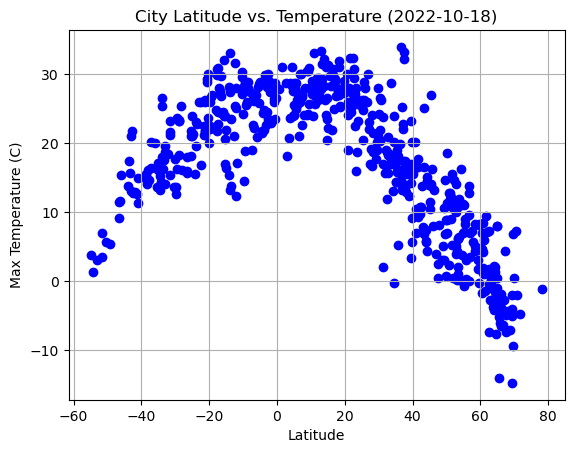

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="blue", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

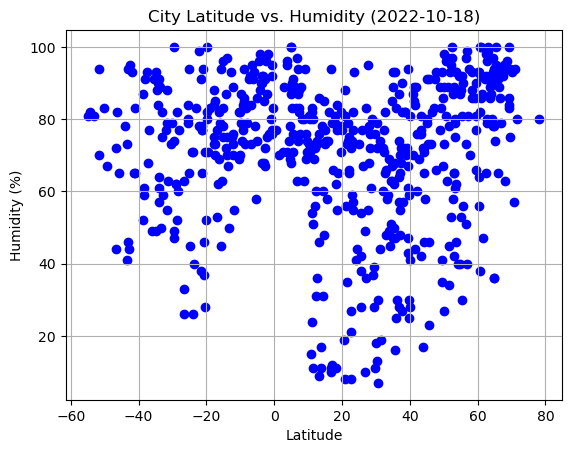

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="blue", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

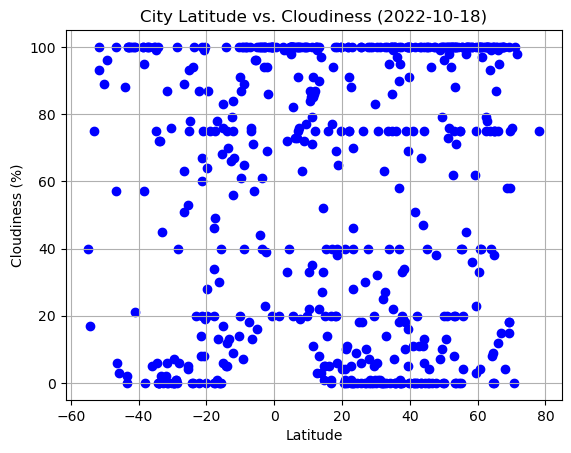

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="blue", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

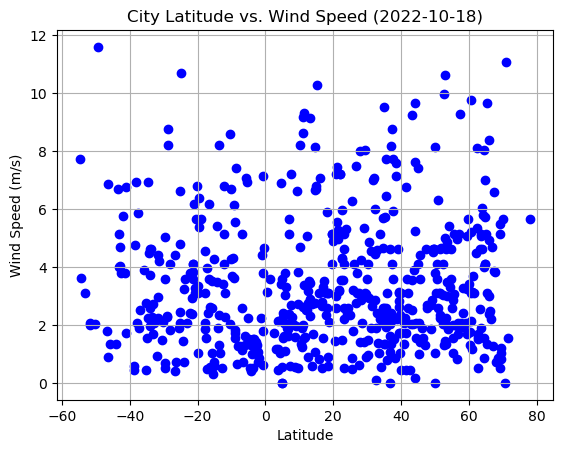

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="blue", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_axis, y_axis, xtitle, ytitle, text_coordinates):
    #lin reg eqts
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_vals = x_axis*slope + intercept
    line_eqtn = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plotting
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis, regress_vals, "r-")
    plt.annotate(line_eqtn, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
    print(f"The r-value is: {rvalue}")
    plt.show

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pont rouge,48.8833,-72.0825,5.06,77,7,1.85,CA,1682644927
1,shwebo,22.5667,95.7000,32.28,27,1,1.49,MM,1682644927
2,kodiak,57.7900,-152.4072,5.73,70,100,2.06,US,1682644927
4,ilulissat,69.2167,-51.1000,-1.99,86,15,0.51,GL,1682644928
6,crane,31.3974,-102.3501,23.84,19,0,2.67,US,1682644928


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,5.46,67,96,11.60,TF,1682644927
5,grytviken,-54.2811,-36.5092,1.35,82,17,3.62,GS,1682644928
9,callao,-12.0667,-77.1500,25.16,73,75,5.14,PE,1682644929
10,sola,-13.8833,167.5500,27.43,70,5,1.88,VU,1682644930
11,puerto ayora,-0.7393,-90.3518,26.42,92,100,1.79,EC,1682644930


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8924405842230015


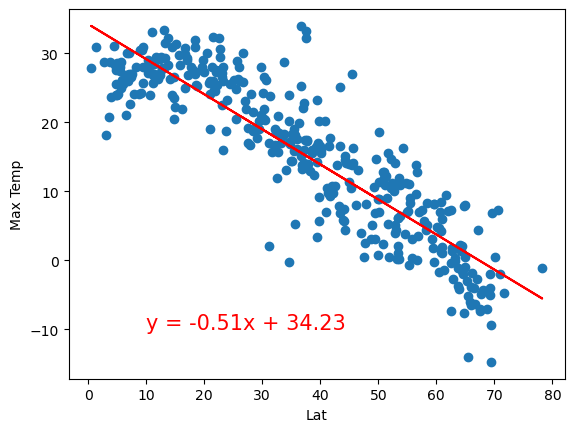

In [23]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_reg_plot(x, y, "Lat", "Max Temp", (10,-10))


The r-value is: 0.746901064244586


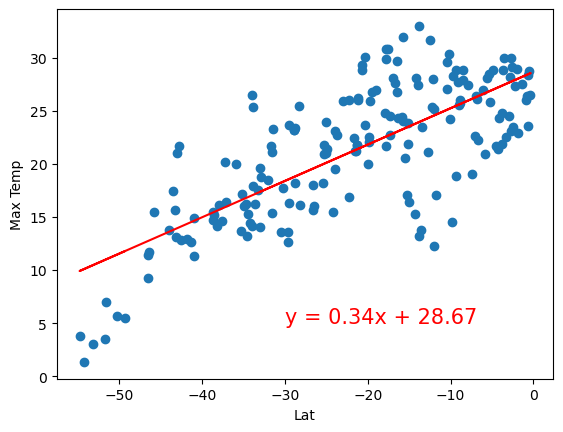

In [24]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_reg_plot(x, y, "Lat", "Max Temp", (-30,5))


**Discussion about the linear relationship:** The northern and souther hemisphere's linear regression lines go very well with its data points but in the southern hemisphere there are some data points that stagger further away from it. The north. hemis. has a negative regression line while the south. hemis. has a positive one thus we can see there is a correlation with their data points. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21822950087562432


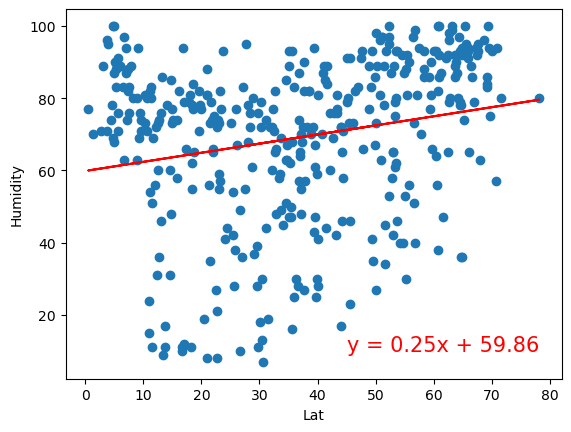

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_reg_plot(x, y, "Lat", "Humidity", (45,10))


The r-value is: 0.22641789988618014


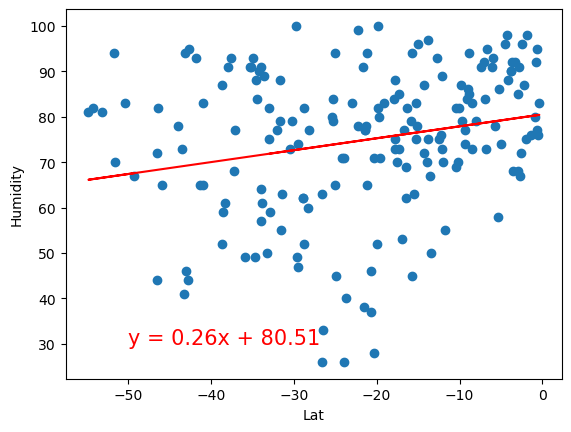

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_reg_plot(x, y, "Lat", "Humidity", (-50,30))


**Discussion about the linear relationship:** The north. and south hemis. have very similar linear regression. Around those big areas the data seems to vary since in their linear regressions, the majority of the data points are away from the the linear regressions. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.061208199191800046


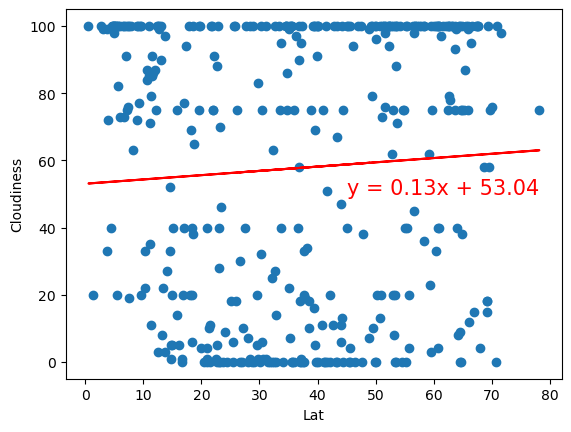

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_reg_plot(x, y, "Lat", "Cloudiness", (45,50))


The r-value is: 0.12959394915144226


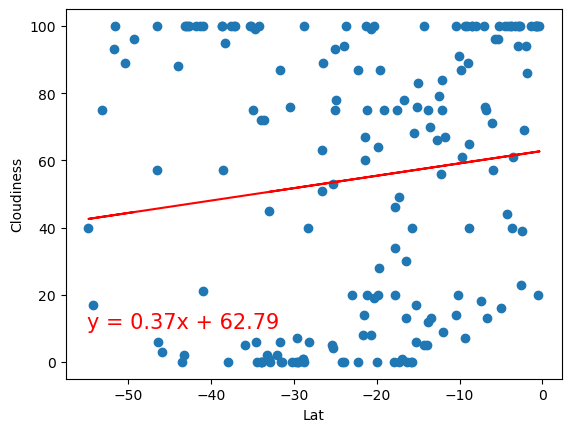

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_reg_plot(x, y, "Lat", "Cloudiness", (-55,10))


**Discussion about the linear relationship:** The north. and south. hemis. is the same as the previous one where their slopes are very similar but their data points are even further away so it makes the linear regression line seem unreliable and inaccurate since there's not much of correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06761029944143697


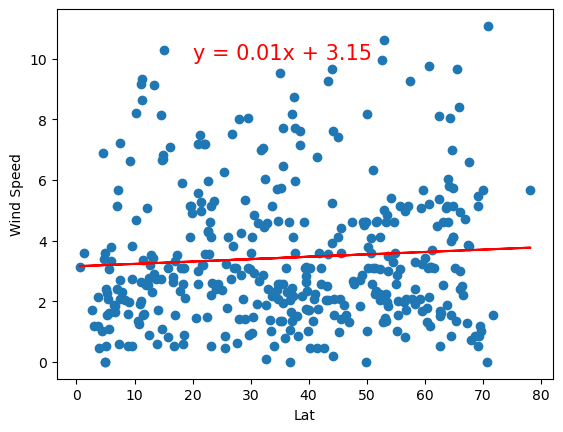

In [27]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_reg_plot(x, y, "Lat", "Wind Speed", (20,10))


The r-value is: -0.18440757777025138


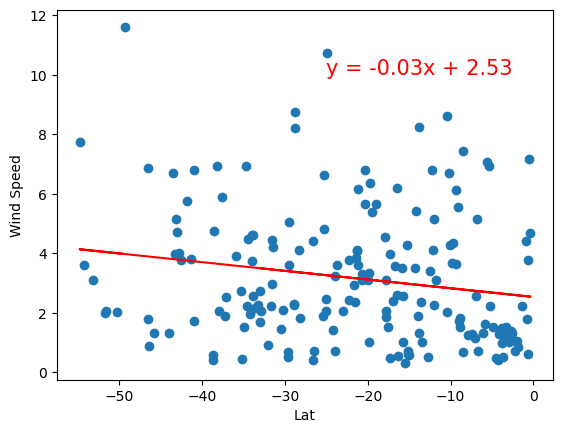

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_reg_plot(x, y, "Lat", "Wind Speed", (-25,10))


**Discussion about the linear relationship:** The linear regression on both are negative and are not steep but because the data is very scattered and far from the linear regression line it does not seem to correlate much but the points are closer on both towards the low Wind Speed numbers.